<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 5.1 이항 분류

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white]) #정답지와 합친 것,,,

In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [5]:
wine['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [6]:
wine_norm = (wine - wine.min()) / (wine.max()-wine.min())
wine_norm.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1.0
4897,0.181818,0.086667,0.228916,0.003067,0.018272,0.072917,0.211982,0.044342,0.418605,0.056180,0.550725,0.500000,1.0


In [7]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

In [8]:
import tensorflow as tf

In [9]:
train_idx = int(len(wine_np)*0.8)
train_X, train_y = wine_np[: train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_y[0])
print(test_X[0])
print(test_y[0])

[0.1322314  0.14       0.22891566 0.00920245 0.03322259 0.10416667
 0.29032258 0.0354733  0.43410853 0.07865169 0.63768116 0.5       ]
1.0
[0.23140496 0.13333333 0.18072289 0.18865031 0.03986711 0.10416667
 0.39400922 0.14806246 0.31007752 0.09550562 0.46376812 0.5       ]
1.0


In [10]:
# 아웃풋 레이어(정답지)를 y에 맞게 바꿔줘야 함 => 원핫인코딩 (특히 multiclass인 경우에)
# 1-->0,1
# 0-->1.0
train_y = tf.keras.utils.to_categorical(train_y, num_classes =2) #num_classes : 분류하고자 하는 정답지의 수만큼!! 
train_y[0]

array([0., 1.], dtype=float32)

In [11]:
test_y = tf.keras.utils.to_categorical(test_y, num_classes =2) #num_classes : 분류하고자 하는 정답지의 수만큼!! 
test_y[0]

array([0., 1.], dtype=float32)

In [12]:
train_X[0].shape

(12,)

In [13]:
train_X.shape #5197데이터 갯수, 12컬럼.

(5197, 12)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 48, activation='relu', input_shape= (12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax'),
    
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.07),# =optimizer = 'Adam' 으로 할 수 있으나, 정확성 떨어짐.
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(train_X, train_y, epochs=25, batch_size=32, validation_split=0.25) 
# validation : train_X, train_y에서 1/4만큼 킾해놓고, 검증용으로 씀!! (새로운 데이터를 위함)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9425 - val_loss: 0.0589 - val_accuracy: 0.9808
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9851 - val_loss: 0.0730 - val_accuracy: 0.9746
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9877 - val_loss: 0.0372 - val_accuracy: 0.9908
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9872 - val_loss: 0.0447 - val_accuracy: 0.9869
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9879 - val_loss: 0.0331 - val_accuracy: 0.9923
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9879 - val_loss: 0.0312 - val_accuracy: 0.9908
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9882 - val_loss: 0.0308 - val_accuracy: 0.9900
Epoch 

In [16]:
model.evaluate(test_X, test_y)

41/41 [==============================] - 0s 707us/step - loss: 0.0563 - accuracy: 0.9908


[0.05632642284035683, 0.9907692074775696]

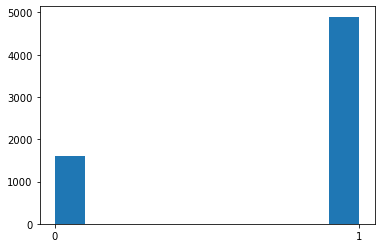

1    4898
0    1599
Name: type, dtype: int64


In [17]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [18]:
# 5.4 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [19]:
# 5.5 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [20]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1781       0.190083          0.160000     0.222892        0.018405   0.069767   
4711       0.132231          0.083333     0.096386        0.183282   0.069767   
2676       0.314050          0.013333     0.198795        0.006135   0.036545   
4642       0.157025          0.106667     0.180723        0.010736   0.034884   
1199       0.297521          0.113333     0.222892        0.096626   0.018272   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1781             0.041667              0.447005  0.142472  0.596899   
4711             0.104167              0.251152  0.164450  0.527132   
2676             0.111111              0.200461  0.073838  0.263566   
4642             0.083333              0.211982  0.049547  0.503876   
1199             0.045139              0.200461  0.130904  0.217054   

      sulphates   alcohol   quality  type  
1781   0.123596  0.362319  0.166667   1.0 

In [21]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.19008264 0.16       0.22289157 0.01840491 0.06976744 0.04166667
 0.44700461 0.14247156 0.59689922 0.12359551 0.36231884 0.16666667]
1.0
[0.17355372 0.17333333 0.15060241 0.02147239 0.05481728 0.03819444
 0.23963134 0.06227106 0.23255814 0.17977528 0.49275362 0.5       ]
1.0
[0. 1.]
[0. 1.]


In [22]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


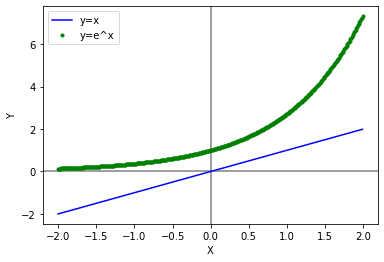

In [23]:
# 그림 5.5 출력 코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [24]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9448 - val_loss: 0.0529 - val_accuracy: 0.9862
Epoch 2/25
122/122 [==============================] - 0s 948us/step - loss: 0.0532 - accuracy: 0.9828 - val_loss: 0.0499 - val_accuracy: 0.9877
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9872 - val_loss: 0.0389 - val_accuracy: 0.9854
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9877 - val_loss: 0.0364 - val_accuracy: 0.9877
Epoch 5/25
122/122 [==============================] - 0s 875us/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0319 - val_accuracy: 0.9846
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9879 - val_loss: 0.0872 - val_accuracy: 0.9792
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9910 - val_loss: 0.0334 - val_accuracy: 0.9885
Ep

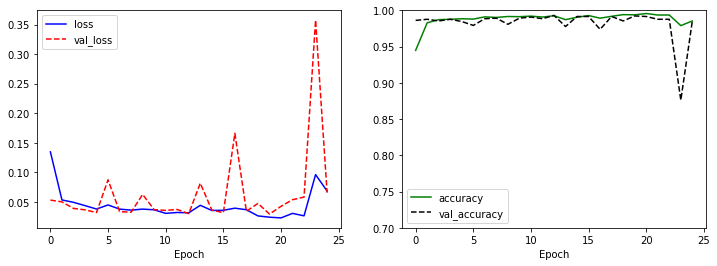

In [25]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [26]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 584us/step - loss: 0.0473 - accuracy: 0.9908


[0.04730064421892166, 0.9907692074775696]

#5.2 다항 분류

In [27]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


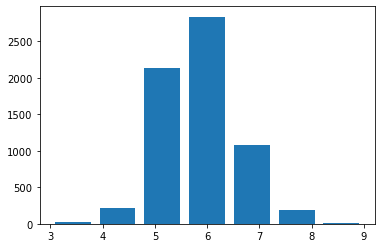

In [28]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [29]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [30]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [31]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 1.0018 - accuracy: 0.4806 - val_loss: 0.9005 - val_accuracy: 0.5185
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8916 - accuracy: 0.5558 - val_loss: 0.8515 - val_accuracy: 0.5608
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8798 - accuracy: 0.5697 - val_loss: 0.8671 - val_accuracy: 0.5623
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8701 - accuracy: 0.5722 - val_loss: 0.8489 - val_accuracy: 0.5815
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8681 - accuracy: 0.5761 - val_loss: 0.8337 - val_accuracy: 0.5885
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8621 - accuracy: 0.5753 - val_loss: 0.8347 - val_accuracy: 0.5862
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8560 - accuracy: 0.5846 - val_loss: 0.8322 - val_accuracy: 0.6000
Epoch 

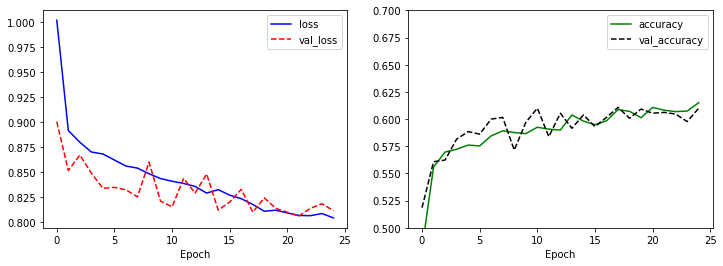

In [32]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

In [33]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 511us/step - loss: 0.8136 - accuracy: 0.5946


[0.8136043548583984, 0.5946153998374939]

#5.3 Fashion MNIST

In [34]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


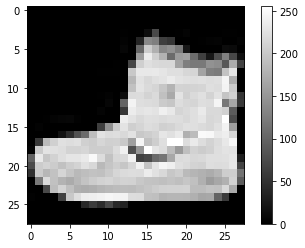

9


In [35]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [36]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [37]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 1s 992us/step - loss: 0.5261 - accuracy: 0.8154 - val_loss: 0.4138 - val_accuracy: 0.8543
Epoch 2/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3943 - accuracy: 0.8588 - val_loss: 0.3841 - val_accuracy: 0.8598
Epoch 3/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3511 - accuracy: 0.8725 - val_loss: 0.3630 - val_accuracy: 0.8727
Epoch 4/25
1407/1407 [==============================] - 1s 796us/step - loss: 0.3224 - accuracy: 0.8816 - val_loss: 0.3486 - val_accuracy: 0.8733
Epoch 5/25
1407/1407 [==============================] - 1s 892us/step - loss: 0.3043 - accuracy: 0.8882 - val_loss: 0.3550 - val_accuracy: 0.8701
Epoch 6/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2881 - accuracy: 0.8941 - val_loss: 0.3229 - val_accuracy: 0.8827
Epoch 7/25
1407/1407 [==============================] - 1s 771us/step - loss: 0.2767 - accuracy: 0.8969 - val_loss: 0.3217 - val_a

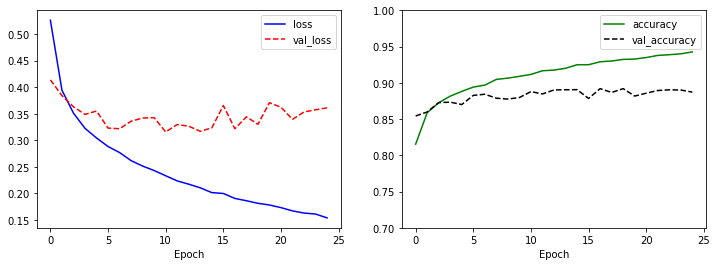

In [39]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [40]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 759us/step - loss: 0.4049 - accuracy: 0.8820


[0.40489012002944946, 0.8820000290870667]